In [1]:
# подключение основных библиотек
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
#подгружаем и просматриваем наш датасет на 1660 файлов
df = pd.read_csv('1660_films.csv')
df

,ID_kinopoisk,week,month,screens,budget,age_R,time,genre_box_buget,genre_avr_kinopoisk_R,genre_avr_box,...,skr2_box_buget,skr2_avr_kinopoisk_R,skr2_avr_box,skr2_avr_views,box_budget,kinopoisk_R,box,views,rezult,rezult4
0,70952.0,7,2,100,46096480.0,12.0,115.0,0.51,6.18,66377566,...,1.17,7.40,54000000.0,551000.0,1.17,7.4,54000000,551000,0,1
1,77396.0,14,4,117,57620600.0,0.0,98.0,0.94,5.23,181394667,...,0.78,4.80,45000000.0,464000.0,0.78,4.8,45000000,464000,0,0
2,79850.0,28,7,315,121003260.0,16.0,115.0,0.94,5.23,181394667,...,1.66,6.33,209666667.0,2029000.0,3.84,6.1,465000000,4400000,1,3
3,253754.0,40,9,47,46096480.0,12.0,101.0,0.51,6.18,66377566,...,0.25,5.90,24275000.0,124000.0,0.16,6.4,7300000,61000,0,0
4,252013.0,44,10,188,57620600.0,6.0,90.0,1.19,6.07,148983326,...,0.33,6.70,19000000.0,295000.0,0.33,6.7,19000000,295000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,4493006.0,15,4,1656,39100000.0,12.0,91.0,1.88,5.36,129218872,...,0.25,5.90,24275000.0,124000.0,0.52,6.3,20396022,75750,0,0
1657,4400163.0,15,4,235,51790451.0,18.0,75.0,0.51,6.18,66377566,...,0.02,0.00,881000.0,2634.0,0.02,6.0,881000,2634,0,0
1658,5059142.0,16,4,23,79817750.0,16.0,101.0,0.51,6.18,66377566,...,1.04,7.10,16541000.0,84123.0,0.29,6.0,82000,245,0,0
1659,5002368.0,16,4,66,79817750.0,18.0,120.0,0.51,6.18,66377566,...,0.00,0.00,496626.0,1411.0,0.29,6.0,496626,1411,0,0


In [3]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["rezult"] # отбираем столбец с откликами

In [4]:
from sklearn.model_selection import train_test_split
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [23]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
#предсказание с помощью обученной модели
Y_pred = decision_tree.predict(X_test)

In [25]:
#ищем вероятности отнесения к 0 и 1 классу объектов тестовых данных 
y_pred_proba = decision_tree.predict_proba(X_test)[:,1]

In [28]:
print('Точность предсказаний:',metrics.accuracy_score(Y_pred, y_test))
print('Количество предсказанных верно из 499:', metrics.accuracy_score(Y_pred, y_test, normalize=False))
a1= metrics.accuracy_score(Y_pred, y_test)

Точность предсказаний: 0.9158316633266533
Количество предсказанных верно из 499: 457


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, Y_pred)
print('Матрица ошибок:')
print(conf_matrix)

Матрица ошибок:
[[422  19]
 [ 23  35]]


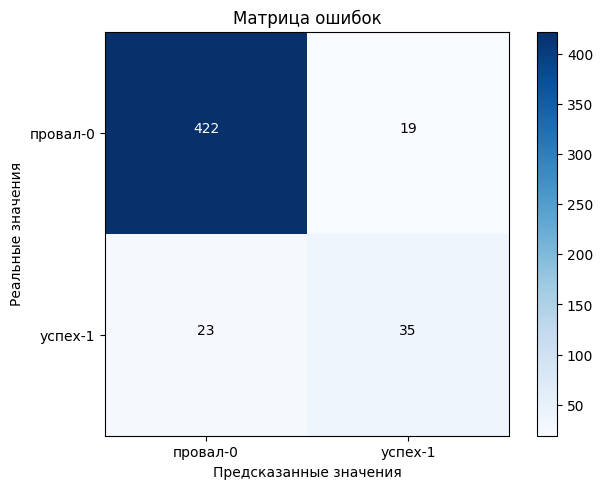

In [30]:
#сделаем картинку красивой
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Создаем матрицу ошибок
confusion_matrix = np.array([[422,  19],
                            [23, 35]])

# Создаем список меток классов
labels = ["провал-0", "успех-1"]

# Отображение матрицы ошибок
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()

# Добавляем метки осей
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Добавляем числа в ячейки
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Делаем красивые настройки
plt.tight_layout()
plt.ylabel("Реальные значения")
plt.xlabel("Предсказанные значения")
plt.show()

In [31]:
# Отчет о классификации
class_report = classification_report(y_test, Y_pred, digits=4)
print('Отчет о классификации:')
print(class_report)

Отчет о классификации:
              precision    recall  f1-score   support

           0     0.9483    0.9569    0.9526       441
           1     0.6481    0.6034    0.6250        58

    accuracy                         0.9158       499
   macro avg     0.7982    0.7802    0.7888       499
weighted avg     0.9134    0.9158    0.9145       499



In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import accuracy_score

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [ 3, 4, 5, 6]
min_samples_split = [10, 12, 15]
min_samples_leaf = [1, 2, 3, 4]
max_features = [ 5, 6, 7, 8]

cv = StratifiedKFold(10)

decision_tree = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(estimator=decision_tree, cv=cv, 
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                        max_features= max_features))
grid_dt.fit(X_train, y_train)
print("best score: ", grid_dt.best_score_)
print("best param: ", grid_dt.best_params_)
print("test score:", grid_dt.score(X_test, y_test))

best score:  0.9560934276451519
best param:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 15, 'splitter': 'best'}
test score: 0.9418837675350702


In [41]:
#Создадим новый классификатор 
#from sklearn import tree
final_decision_tree = DecisionTreeClassifier(random_state=42)
final_decision_tree = grid_dt.best_estimator_   #передадим полученные лучшие параметры в классификатор

In [42]:
#Запустим обучение модели с подобранными гиперпараметрами
final_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=7, min_samples_leaf=2,
                       min_samples_split=15, random_state=42)

In [46]:
#предсказание с помощью обученной модели 
Y_pred = final_decision_tree.predict(X_test)

In [47]:
print('Точность предсказаний:',metrics.accuracy_score(Y_pred, y_test))
print('Количество предсказанных верно из 499:', metrics.accuracy_score(Y_pred, y_test, normalize=False))
a1= metrics.accuracy_score(Y_pred, y_test)

Точность предсказаний: 0.9418837675350702
Количество предсказанных верно из 499: 470


In [48]:
# Отчет о классификации
class_report = classification_report(y_test, Y_pred, digits=4)
print('Отчет о классификации:')
print(class_report)

Отчет о классификации:
              precision    recall  f1-score   support

           0     0.9703    0.9637    0.9670       441
           1     0.7377    0.7759    0.7563        58

    accuracy                         0.9419       499
   macro avg     0.8540    0.8698    0.8617       499
weighted avg     0.9433    0.9419    0.9425       499



In [51]:
from sklearn.metrics import confusion_matrix, classification_report

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, Y_pred)
print('Матрица ошибок:')
print(conf_matrix)

Матрица ошибок:
[[425  16]
 [ 13  45]]


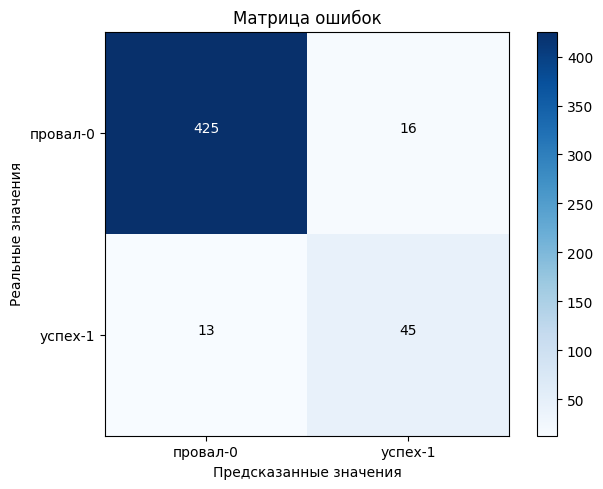

In [53]:
#Создаем матрицу ошибок
confusion_matrix = np.array([[425,  16],
                            [13, 45]])

# Создаем список меток классов
labels = ["провал-0", "успех-1"]

# Отображение матрицы ошибок
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()

# Добавляем метки осей
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Добавляем числа в ячейки
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Делаем красивые настройки
plt.tight_layout()
plt.ylabel("Реальные значения")
plt.xlabel("Предсказанные значения")
plt.show()